# Problem statement:
<br>To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

In [3]:
# Importing the required libraries
import os
import PIL
import pathlib
from glob import glob

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from google.colab import drive
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Mouting the google drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
# Defining the path for train and test images
data_dir_train = pathlib.Path("./gdrive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('./gdrive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [6]:
# Extrating the image count of train and test data
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Create a dataset

In [7]:
# Defining the parameters to import the dataset
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [8]:
# Importing the train dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(directory="./gdrive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train",
                                                               labels='inferred', label_mode='categorical', image_size=(img_height, img_width), batch_size=32, seed=123)

Found 2239 files belonging to 9 classes.


In [9]:
# Importing the test dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(directory="./gdrive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Test",
                                                               labels='inferred', label_mode='categorical', image_size=(img_height, img_width), batch_size=32, seed=123)

Found 118 files belonging to 9 classes.


In [10]:
# Class names of the dataset
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data

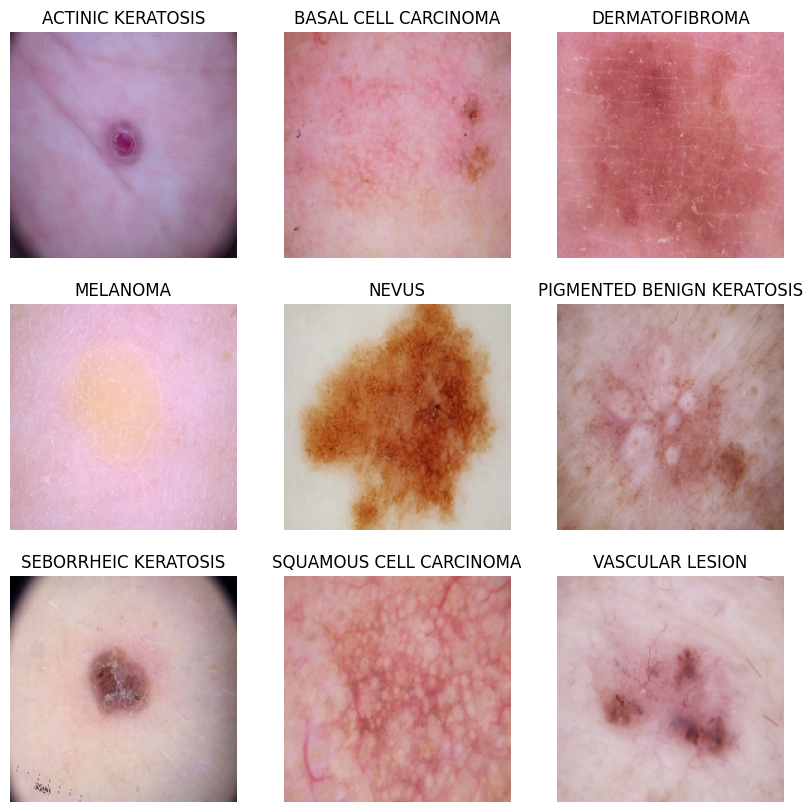

In [11]:
# Random images of the different class dataset
fig = plt.figure(figsize=(10,10))
for image, label in train_ds.take(1):
    for i in range(len(class_names)):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(class_names[i].upper())
        plt.axis("off")
plt.show()

In [12]:
# Parameters for the dataset
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model

In [13]:
# Initial model with Convolution layer
model = Sequential()

model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=train_ds.element_spec[0].shape[1:]))
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(len(class_names), activation='softmax'))

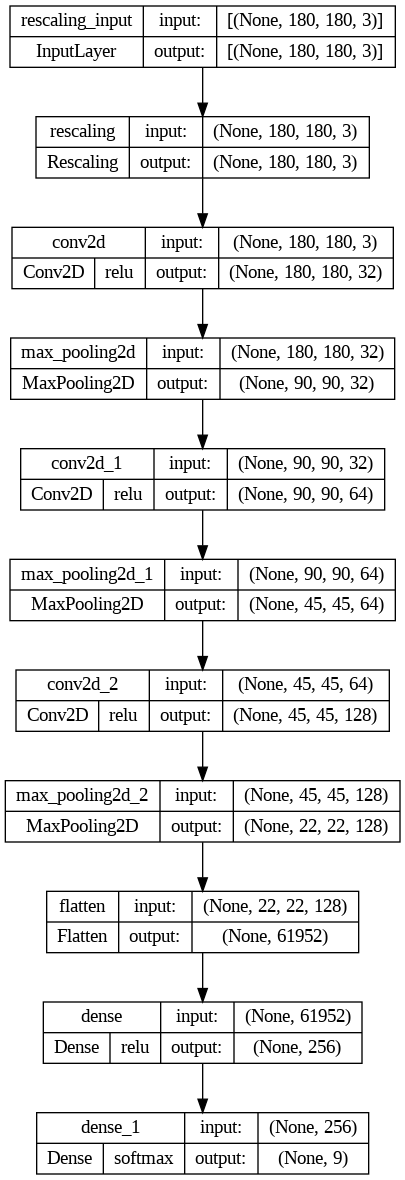

In [14]:
# Plotting the model and model parameters
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True, show_layer_activations=True)

### Compile the model

In [15]:
# Compiling the created model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
# Summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 128)       7

### Train the model

In [17]:
# Model training
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
70/70 [==============================] - 379s 428ms/step - loss: 2.0671 - accuracy: 0.2631 - val_loss: 2.2005 - val_accuracy: 0.1695
Epoch 2/20
70/70 [==============================] - 3s 36ms/step - loss: 1.5726 - accuracy: 0.4279 - val_loss: 2.2242 - val_accuracy: 0.3390
Epoch 3/20
70/70 [==============================] - 3s 36ms/step - loss: 1.4142 - accuracy: 0.5033 - val_loss: 2.3429 - val_accuracy: 0.3390
Epoch 4/20
70/70 [==============================] - 3s 38ms/step - loss: 1.3150 - accuracy: 0.5351 - val_loss: 2.1489 - val_accuracy: 0.2797
Epoch 5/20
70/70 [==============================] - 3s 37ms/step - loss: 1.3073 - accuracy: 0.5377 - val_loss: 2.1678 - val_accuracy: 0.3390
Epoch 6/20
70/70 [==============================] - 3s 36ms/step - loss: 1.1435 - accuracy: 0.5949 - val_loss: 2.4437 - val_accuracy: 0.3475
Epoch 7/20
70/70 [==============================] - 3s 36ms/step - loss: 1.0485 - accuracy: 0.6360 - val_loss: 2.3982 - val_accuracy: 0.3814
Epoch 8/20

### Visualizing training results

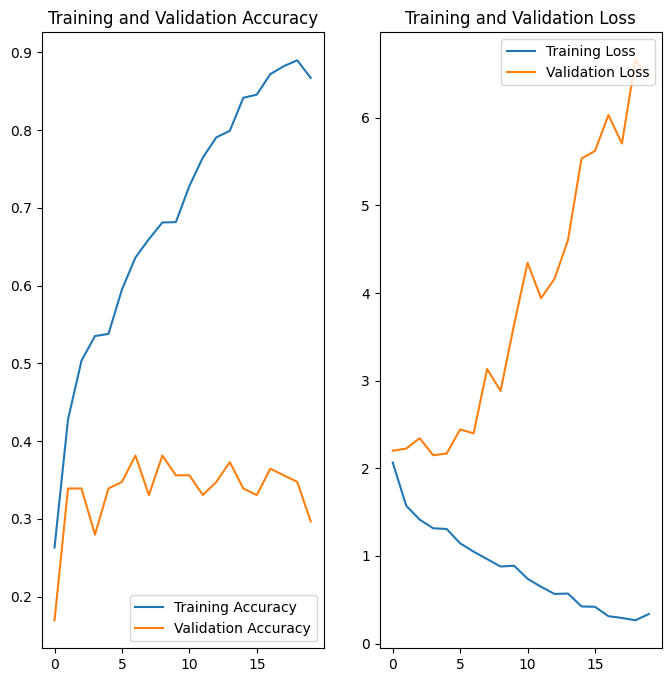

In [18]:
# Visualizing the model accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

As we can see the training accuracy and the validation accuracy vary in a very larger scale. <br>The model is an overfit model. This might be because of class imbalance.

In [19]:
# Random augmentation of the Random class of the dataset
augment_data = keras.Sequential()
augment_data.add(layers.experimental.preprocessing.RandomFlip('vertical', input_shape=(img_height, img_width, 3)))
augment_data.add(layers.experimental.preprocessing.RandomContrast(factor=(0.3, 0.7)))
augment_data.add(layers.experimental.preprocessing.RandomCrop(height=150, width=150))
augment_data.add(layers.experimental.preprocessing.RandomRotation(0.4))


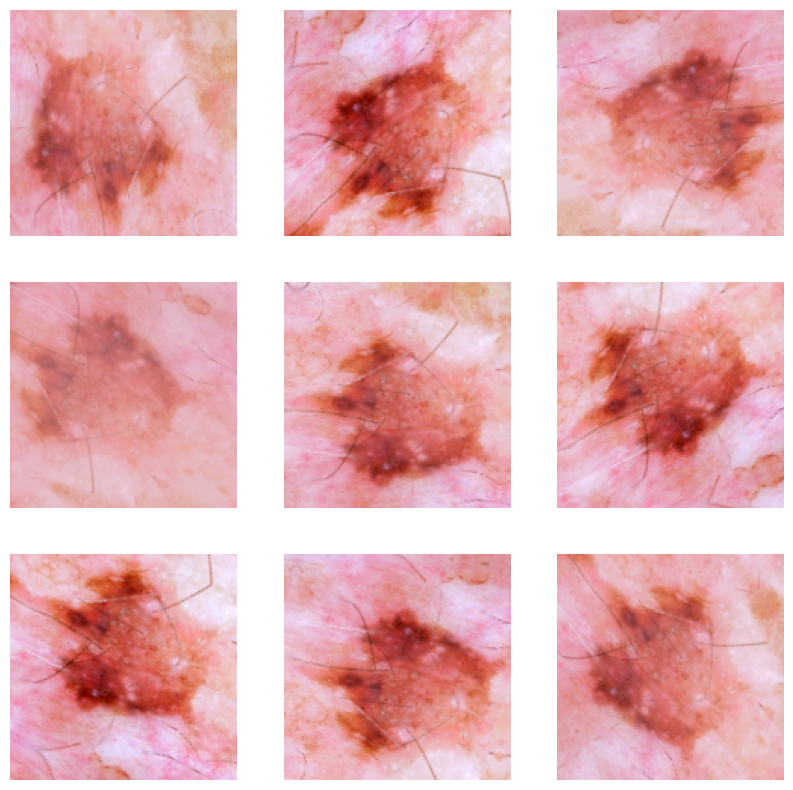

In [20]:
# Random visualization of the augmented data
plt.figure(figsize=(10,10))
for images, _ in train_ds.take(1):
    for i in range(9):
        image = augment_data(images)
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(image[0].numpy().astype('uint8'))
        plt.axis('off')

### Creating another model on the Randomly augmented images

In [21]:
# CNN model on the augmented dataset
model1 = keras.Sequential([augment_data,
layers.experimental.preprocessing.Rescaling(1./255),
layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'),
layers.MaxPooling2D(),
layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
layers.MaxPooling2D(),
layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
layers.MaxPooling2D(),
layers.Flatten(),
layers.Dense(256, activation='relu'),
layers.Dense(len(class_names), activation='softmax')]
)

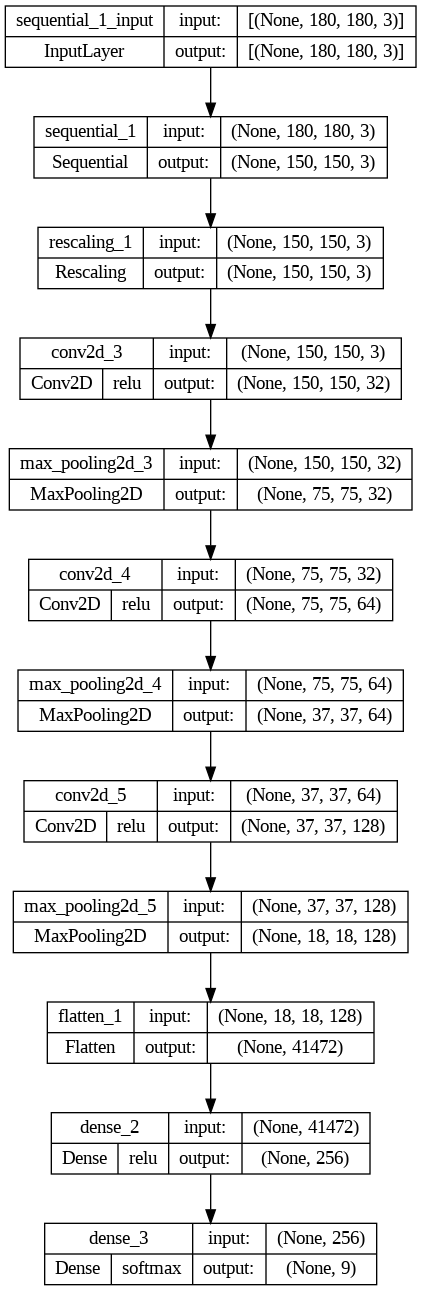

In [22]:
# Visualization of the model and model parameters
plot_model(model1, to_file='model1_image.png', show_shapes=True, show_layer_names=True, show_layer_activations=True)

### Compiling the model

In [23]:
# Model compilation
model1.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [24]:
# Model summary
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 150, 150, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 150, 150, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 75, 75, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 37, 37, 64)        0         
 g2D)                                                 

### Training the model

In [25]:
# Model training
history = model1.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/20
70/70 [==============================] - 6s 45ms/step - loss: 2.0117 - accuracy: 0.2506 - val_loss: 2.2126 - val_accuracy: 0.1610
Epoch 2/20
70/70 [==============================] - 2s 31ms/step - loss: 1.7525 - accuracy: 0.3640 - val_loss: 2.0169 - val_accuracy: 0.2458
Epoch 3/20
70/70 [==============================] - 2s 33ms/step - loss: 1.5432 - accuracy: 0.4560 - val_loss: 2.0970 - val_accuracy: 0.2966
Epoch 4/20
70/70 [==============================] - 2s 32ms/step - loss: 1.5644 - accuracy: 0.4399 - val_loss: 2.0029 - val_accuracy: 0.2712
Epoch 5/20
70/70 [==============================] - 2s 31ms/step - loss: 1.4756 - accuracy: 0.4743 - val_loss: 2.0292 - val_accuracy: 0.3390
Epoch 6/20
70/70 [==============================] - 2s 31ms/step - loss: 1.4476 - accuracy: 0.4877 - val_loss: 2.2833 - val_accuracy: 0.2542
Epoch 7/20
70/70 [==============================] - 2s 31ms/step - loss: 1.4433 - accuracy: 0.4908 - val_loss: 1.9902 - val_accuracy: 0.3305
Epoch 8/20
70

### Visualizing the results

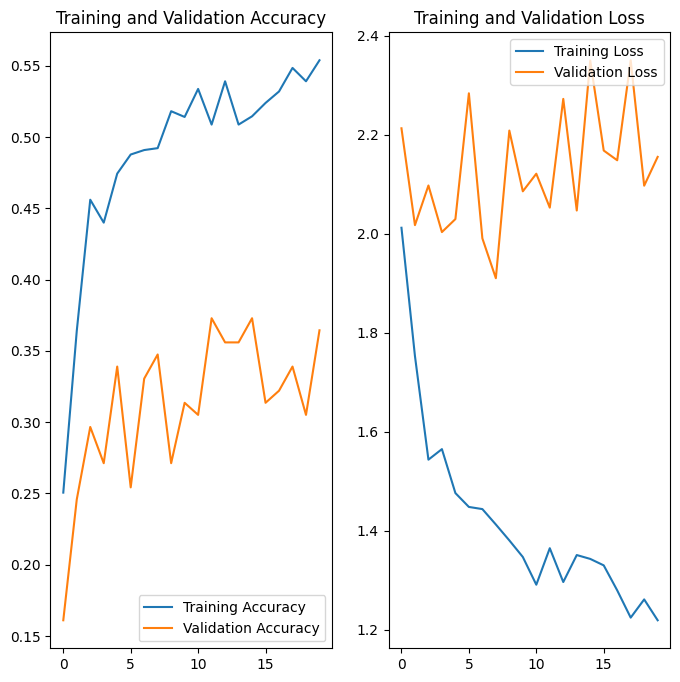

In [26]:
# Visualizing the model's training and validation accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

The above model has improved interms of the gap between the training and testing accuracy. But even so the model is overfit as the accuracy is less.

## The distribution of classes in the training dataset.


In [27]:
# Class distribution of train dataset
class_dist = list()
for i in class_names:
    class_dist.append(tuple([i, len(os.listdir(os.path.join(data_dir_train, i)))]))
    print(f'{i}: {len(os.listdir(os.path.join(data_dir_train, i)))}')
class_df = pd.DataFrame(class_dist, columns=['class', 'image_count'])

actinic keratosis: 114
basal cell carcinoma: 376
dermatofibroma: 95
melanoma: 438
nevus: 357
pigmented benign keratosis: 462
seborrheic keratosis: 77
squamous cell carcinoma: 181
vascular lesion: 139


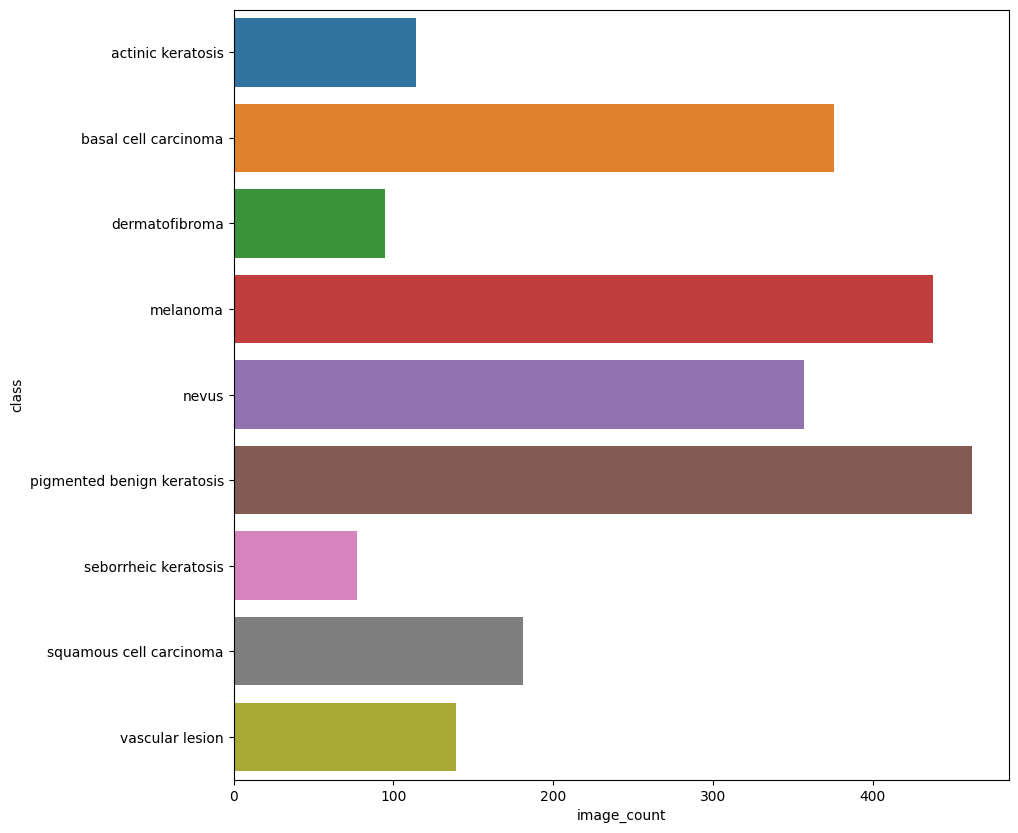

In [28]:
# Visualizing the class imbalance
plt.figure(figsize=(10, 10))
sns.barplot(data=class_df, x='image_count', y='class')
plt.show()

### The class distribution is as follows:
- Seborrheic Keratosis has the least number of images.
- Pigmented Benign Keratosis has the highest number of images among the dataset


In [29]:
# Total images in the train dataset
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)

2239


In [30]:
# Path to every image in train data
path_list = [x for x in glob(os.path.join(data_dir_train, '*','*.jpg'))]
path_list

['gdrive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/ISIC_0000027.jpg',
 'gdrive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/ISIC_0000020.jpg',
 'gdrive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/ISIC_0000039.jpg',
 'gdrive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/ISIC_0000037.jpg',
 'gdrive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/ISIC_0000038.jpg',
 'gdrive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/ISIC_0000024.jpg',
 'gdrive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/ISIC_0000028.jpg',
 'gdrive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/ISIC_0000032.jpg',
 'gdrive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train

In [31]:
# Class names of the train dataset
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list

['nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',


In [32]:
# Creating the dataframe with Path to every image and it's labels
dataframe_dict_new = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_new.items()), columns=['Path', 'Label'])
original_df

,Path,Label
0,gdrive/MyDrive/CNN/Skin cancer ISIC The Intern...,nevus
1,gdrive/MyDrive/CNN/Skin cancer ISIC The Intern...,nevus
2,gdrive/MyDrive/CNN/Skin cancer ISIC The Intern...,nevus
3,gdrive/MyDrive/CNN/Skin cancer ISIC The Intern...,nevus
4,gdrive/MyDrive/CNN/Skin cancer ISIC The Intern...,nevus
...,...,...
2234,gdrive/MyDrive/CNN/Skin cancer ISIC The Intern...,dermatofibroma
2235,gdrive/MyDrive/CNN/Skin cancer ISIC The Intern...,dermatofibroma
2236,gdrive/MyDrive/CNN/Skin cancer ISIC The Intern...,dermatofibroma
2237,gdrive/MyDrive/CNN/Skin cancer ISIC The Intern...,dermatofibroma


#### Rectify the class imbalance


In [33]:
# Installing Augmentor library
!pip install Augmentor

In [34]:
# Augmenting the train dataset
path_to_training_dataset="./gdrive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)

Initialised with 114 image(s) found.
Output directory set to ./gdrive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7C8D8106FB20>: 100%|██████████| 500/500 [00:19<00:00, 25.56 Samples/s]


Initialised with 376 image(s) found.
Output directory set to ./gdrive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7C8D810BB1F0>: 100%|██████████| 500/500 [00:23<00:00, 21.60 Samples/s]


Initialised with 95 image(s) found.
Output directory set to ./gdrive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7C8D8100BC70>: 100%|██████████| 500/500 [00:26<00:00, 18.89 Samples/s]


Initialised with 438 image(s) found.
Output directory set to ./gdrive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x7C8E328F2080>: 100%|██████████| 500/500 [01:28<00:00,  5.67 Samples/s]


Initialised with 357 image(s) found.
Output directory set to ./gdrive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x7C8DEFF15240>: 100%|██████████| 500/500 [01:23<00:00,  6.00 Samples/s]


Initialised with 462 image(s) found.
Output directory set to ./gdrive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7C8D80D079A0>: 100%|██████████| 500/500 [00:16<00:00, 29.42 Samples/s]


Initialised with 77 image(s) found.
Output directory set to ./gdrive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7C8D8163FA90>: 100%|██████████| 500/500 [00:37<00:00, 13.43 Samples/s]


Initialised with 181 image(s) found.
Output directory set to ./gdrive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7C8D813CCEE0>: 100%|██████████| 500/500 [00:19<00:00, 26.27 Samples/s]


Initialised with 139 image(s) found.
Output directory set to ./gdrive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7C8D80D07850>: 100%|██████████| 500/500 [00:16<00:00, 29.70 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [35]:
# Counting the number of images post auugmentation
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


In [36]:
# Path to the augmented dataset
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new

['gdrive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output/nevus_original_ISIC_0000224.jpg_496baded-51fb-4b6c-aa90-ea11922773f0.jpg',
 'gdrive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output/nevus_original_ISIC_0000271.jpg_9d42a828-2c51-408b-be05-ddf0d3b3007f.jpg',
 'gdrive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output/nevus_original_ISIC_0000529.jpg_95a4db67-944d-447e-a5c8-2814015ae751.jpg',
 'gdrive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output/nevus_original_ISIC_0000235.jpg_c9cbcb45-c200-4e2e-a62b-8d27e0af2e97.jpg',
 'gdrive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output/nevus_original_ISIC_0000498.jpg_3cb40ff2-87a9-4ae2-ba5f-6d06c9ff12c7.jpg',
 'gdrive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output/nevus_origina

In [37]:
# Classes of the augmented dataset
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',


In [38]:
# dataframe of the augmented data
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [39]:
# Concatination of the dataframes
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = pd.concat([original_df, df2], axis=0)

### Lets see the distribution of augmented data after adding new images to the original training data.

In [40]:
# Class distribution of the dataset
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### Training the model on the data created using Augmentor

In [41]:
# Parameters for the new model
batch_size = 32
img_height = 180
img_width = 180

#### Creating a training dataset

In [42]:
# Creating train dataset after augmentation
data_dir_train="./gdrive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### Creating a validation dataset

In [43]:
# Creating validation dataset after augmentation
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### Creating model

In [44]:
# Creating CNN model for the augmented dataset
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

model2 = keras.Sequential()
model2.add(layers.experimental.preprocessing.Rescaling(1./255))
model2.add(layers.Conv2D(16, 3, padding='same', activation='relu'))
model2.add(layers.MaxPooling2D())
model2.add(layers.Conv2D(32, 3, padding='same', activation='relu'))
model2.add(layers.MaxPooling2D())
model2.add(layers.Conv2D(64, 3, padding='same', activation='relu'))
model2.add(layers.MaxPooling2D())
model2.add(layers.Conv2D(128, 3, padding='same', activation='relu'))
model2.add(layers.MaxPooling2D())
model2.add(layers.Dropout(0.3))
model2.add(layers.Flatten())
model2.add(layers.Dense(256, activation='relu'))
model2.add(layers.Dense(len(class_names)))

#### Compiling model

In [45]:
# Compiling the model created for augmented dataset
model2.compile(optimizer='adam',
               loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy'])

In [49]:
# Model Summary
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 45, 45, 64)       

#### **Todo:**  Train your model

In [47]:
# Model training on the augmented train dataset
epochs = 50
history = model2.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/50
169/169 [==============================] - 57s 77ms/step - loss: 1.8449 - accuracy: 0.2982 - val_loss: 1.6592 - val_accuracy: 0.3690
Epoch 2/50
169/169 [==============================] - 5s 32ms/step - loss: 1.4437 - accuracy: 0.4431 - val_loss: 1.3385 - val_accuracy: 0.5019
Epoch 3/50
169/169 [==============================] - 5s 32ms/step - loss: 1.2585 - accuracy: 0.5326 - val_loss: 1.1832 - val_accuracy: 0.5568
Epoch 4/50
169/169 [==============================] - 5s 31ms/step - loss: 1.0393 - accuracy: 0.6163 - val_loss: 1.1307 - val_accuracy: 0.5850
Epoch 5/50
169/169 [==============================] - 5s 30ms/step - loss: 0.8923 - accuracy: 0.6721 - val_loss: 0.9060 - val_accuracy: 0.6748
Epoch 6/50
169/169 [==============================] - 5s 32ms/step - loss: 0.6801 - accuracy: 0.7489 - val_loss: 0.7659 - val_accuracy: 0.7335
Epoch 7/50
169/169 [==============================] - 5s 32ms/step - loss: 0.5414 - accuracy: 0.8049 - val_loss: 0.7043 - val_accuracy: 0.771

#### **Todo:**  Visualize the model results

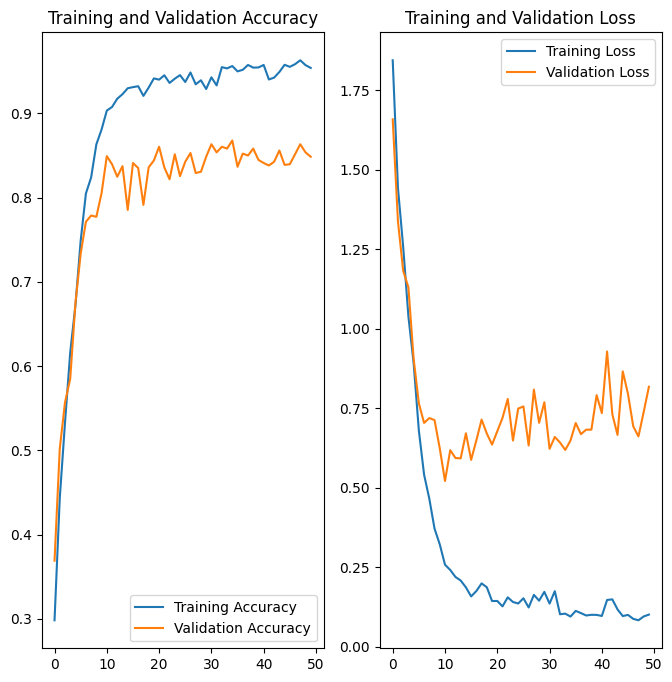

In [48]:
# Vizualising the train and validation accuracy of the model created for augmented dataset
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Summary:
The above model is able to generalize the learnings from the training dataset and apply the learnings and predict appropriate classes on the validation dataset. The data augmentation worked well on the dataset.

